# Материалы

[Презентация](https://docs.google.com/presentation/d/1i2H59nUjhLj2ms5Rpb3o44iYk7Ybv_Ajb9fhp5EHdfE/edit?usp=sharing)

# Анализ оттока клиентов

План исследования:
1. Определение целей и знакомство с данными
- Знакомство с данными

2. Предобработка данных 
- Обработка дубликатов
- Обработка пропусков
- Приведение наименования колонок в корректный вид
- Преобразование данных в нужные типы

3. Исследовательский анализ данных 
- Подсчет доли ушедших клиентов
- Построение гистограмм отточных и оставшихся клиентов по их основным характеристикам 
- Построение гистограмм отточных и оставшихся клиентов по их финансовым данным
- Построение графиков отточных и оставшихся клиентов по данным о доходе и активности клиента
- Матрица и столбец корреляций
- Портрет клиента, который склонен и не склонен уходить из банка

4. Проверка гипотез 
- Определение гипотез: формулировка нулевой и альтернативной гипотезы
- Проведение тестов: Расчет p-значений
- Интерпретация результатов

5. Отбор лучших и формирование сегментов 
- Рекомендации на основе полученных данных

6. Общий вывод

## Определение целей и знакомство с данными

Цель проекта: проанализировать клиентов регионального банка "Метанпром". Выделить сегменты клиентов и определить какие из них склонны уходить из банка.

In [1]:
import pandas as pd
!pip install phik
from phik import phik_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

,Requirement already satisfied: scipy>=1.5.2 in /opt/conda/lib/python3.9/site-packages (from phik) (1.9.1)
,Requirement already satisfied: joblib>=0.14.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.1.0)
,Requirement already satisfied: numpy>=1.18.0 in /opt/conda/lib/python3.9/site-packages (from phik) (1.21.1)
,Requirement already satisfied: pandas>=0.25.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.2.4)
,Requirement already satisfied: matplotlib>=2.2.3 in /opt/conda/lib/python3.9/site-packages (from phik) (3.3.4)
,Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (0.11.0)
,Requirement already satisfied: python-dateutil>=2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (2.8.1)
,Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (2.4.7)
,Requirement already satisfied: pillow>

Ознакомимся с данными

In [2]:
data = pd.read_csv('../../bank_scrooge.csv')
data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 10000 entries, 0 to 9999
,Data columns (total 12 columns):
, #   Column         Non-Null Count  Dtype  
,---  ------         --------------  -----  
, 0   USERID         10000 non-null  int64  
, 1   score          10000 non-null  float64
, 2   city           10000 non-null  object 
, 3   gender         10000 non-null  object 
, 4   age            9974 non-null   float64
, 5   equity         10000 non-null  int64  
, 6   balance        7705 non-null   float64
, 7   products       10000 non-null  int64  
, 8   credit_card    10000 non-null  int64  
, 9   last_activity  10000 non-null  int64  
, 10  EST_SALARY     10000 non-null  float64
, 11  churn          10000 non-null  int64  
,dtypes: float64(4), int64(6), object(2)
,memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [3]:
shape_out = data.shape # Вызовем метод shape для подсчета строк/столбцов таблицы.
print()
print(shape_out)


,(10000, 12)


Ознакомительный просмотр таблицы показал, что в столбцах 'score' и 'age' тип данных float64 (`числа с плавающей точкой`). В столбце 'balance' есть пропуски. Названия столбцов неудобно читаются. 

ВЫВОД ПО РАЗДЕЛУ: в представленном датасете 10000 строк и 12 столбцов. Столбцы 'USERID' и 'EST_SALARY' выделяются среди других названий. Значения в некоторых числовых столбцах требуют замены типа данных для дальнейшего анализа. Встречаются пропуски. 

## Предобработка данных

### Приведение наименования колонок в корректный вид

In [4]:
data.columns = data.columns.str.lower() # Приводим названия колонок к общепринятому стилю.
data = data.rename(columns={'userid': 'user_id'}) # Переименуем столбец.
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


### Обработка дубликатов

In [5]:
data.duplicated().sum()

0

In [6]:
dup_rows = data[data.duplicated(['user_id', 'city'], keep=False)] # Поищем неявные дубликаты.
dup_rows

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


### Обработка пропусков

In [7]:
data.isna().sum()


user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Из 10000 клиентов у 26 не указан возраст. Удалим таких клиентов, т.к. процент потери данных невелик - 0.26%. 
<br> Клиентов без указания баланса на счете оставим. Во-первых, потому что таких клиентов много - 22.95%, а во-вторых, у нас есть столбец 'est_salary' (`оценочный доход клиента`), на который мы тоже можем опираться.

In [8]:
data = data.dropna(subset=['age']) # Удаление клиентов без возраста
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

### Преобразование данных в нужные типы

In [9]:
# Преобразование столбцов age и score в int64
data['age'] = data['age'].astype('int64')
data['score'] = data['score'].astype('int64')

ВЫВОД ПО РАЗДЕЛУ: сменили регистр у двух названий столбцов. Дубликаты явные и неявные в датасете отсутствуют. Удалено 0.26% клиентов без указания возраста. Преобразованы в целочисленные значения столбцы с возрастом 'age' и баллом кредитного скоринга 'score'.

## Исследовательский анализ данных

### Подсчет доли ушедших клиентов

In [10]:
# Подсчет оттока клиентов
churned = data['churn'].sum()
customers = data['churn'].count() # Общее количество клиентов
rate = data['churn'].mean() * 100  # Процент оттока

print(f"Количество ушедших клиентов: {churned}")
print(f"Общее количество клиентов: {customers}")
print(f"Процент оттока клиентов: {rate:.2f}%")

Количество ушедших клиентов: 1819
,Общее количество клиентов: 9974
,Процент оттока клиентов: 18.24%


Много это или мало и по каким причинам они ушли - на эти вопросы мы ответим дальше. 

###  Построение гистограмм отточных и оставшихся клиентов по их основным характеристикам

СКОРИНГОВЫЙ БАЛЛ 

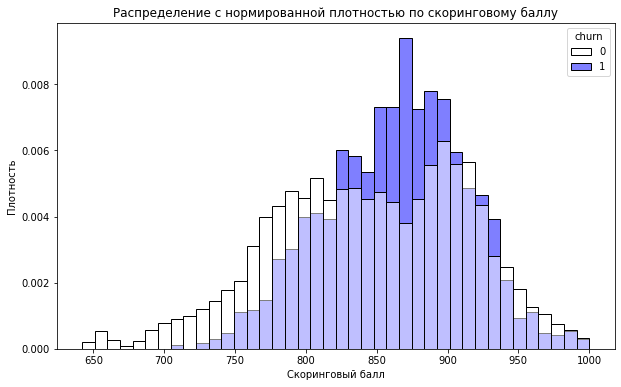

In [11]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='score', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Распределение с нормированной плотностью по скоринговому баллу')
plt.xlabel('Скоринговый балл')
plt.ylabel('Плотность')
plt.show()

Вероятность ухода клиента выше со скоринговым баллом 825-910 и 920-930. Клиентов с наивысшим баллом сколько ушло, столько же и осталось.

ГОРОД КЛИЕНТА

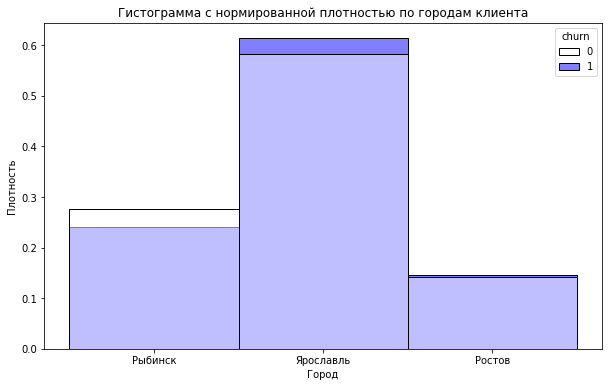

In [12]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='city', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по городам клиента')
plt.xlabel('Город')
plt.ylabel('Плотность')
plt.show()

Вероятность того, что клиент уйдет больше в Ярославле. В Ростове тоже кол-во отточных клиентов больше, чем оставшихся. 

ПОЛ КЛИЕНТА

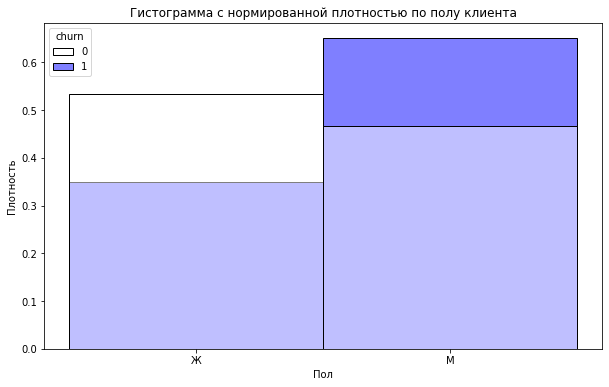

In [13]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='gender', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по полу клиента')
plt.xlabel('Пол')
plt.ylabel('Плотность')
plt.show()

Вероятность, что из банка уйдет мужчина больше.

ВОЗРАСТ КЛИЕНТА

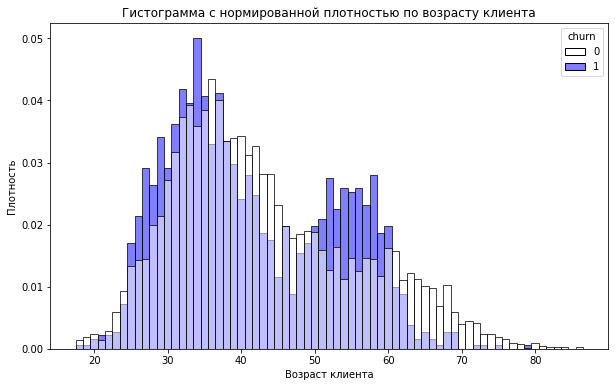

In [14]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='age', discrete=True, stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по возрасту клиента')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность')
plt.show()

В возрасте:
- 18-25 лет клиенты остаются,
- 25-35 лет большой отток, 
- 35-50 лет клиентов больше осталось, чем ушло. 
- 50-60 лет большой отток 
- 60-85 лет клиенты остались. 

### Построение гистограмм отточных и оставшихся клиентов по их финансовым данным

КОЛИЧЕСТВО БАЛЛОВ СОБСТВЕННОСТИ

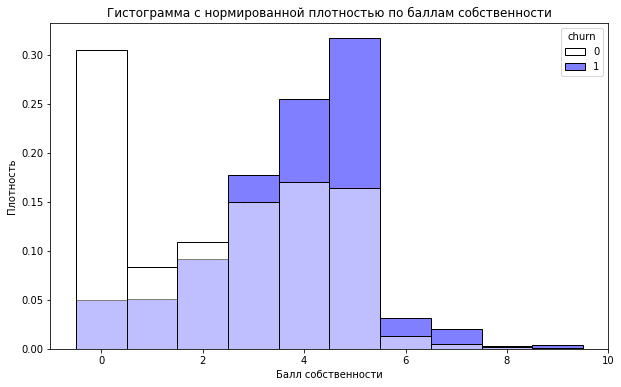

In [15]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='equity', discrete=True, stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по баллам собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Плотность')
plt.show()

Вероятность того, что клиент уйдет больше у тех клиентов, которые имеют от 3х до 9 баллов собственности.

БАЛАНС НА СЧЕТЕ

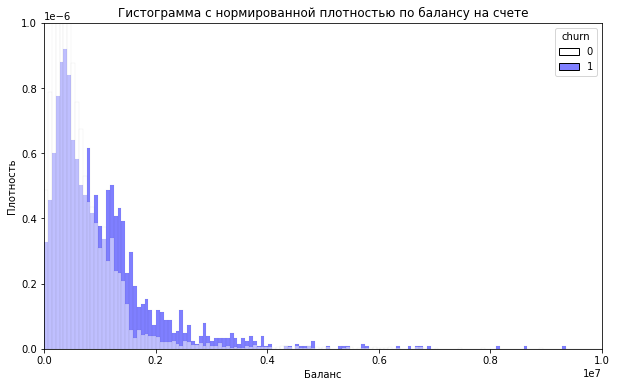

In [16]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='balance', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по балансу на счете')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.ylim(0, 1e-6)
plt.xlim(0, 1e7)
plt.show()

Вероятность отточности наблюдается у клиентов с балансом на счете от 100 тыс до 400 тыс и от 450 до 1 млн. 
<br> * В предобработке данных в данной характеристике было обнаружено много пропусков.

КОЛИЧЕСТВО ПРОДУКТОВ, КОТОРЫМИ ПОЛЬЗУЕТСЯ КЛИЕНТ

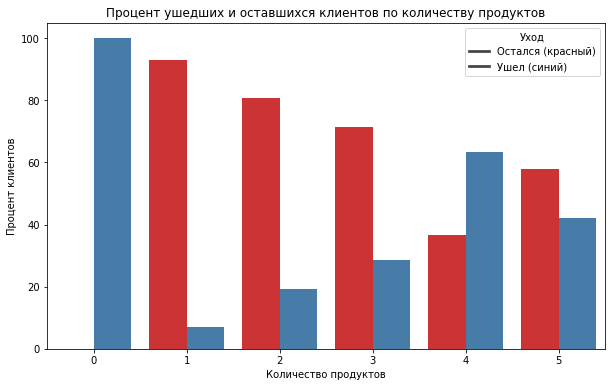

In [17]:
# Подсчет количества ушедших и оставшихся клиентов по количеству продуктов
churn_counts = data.groupby(['products', 'churn']).size().unstack(fill_value=0)

# Расчет процентов
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Преобразование данных для визуализации
churn_percent = churn_percent.reset_index().melt(id_vars='products', value_vars=[0, 1], 
                                                  var_name='churn', value_name='percentage')

# Построение диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_percent, x='products', y='percentage', hue='churn', palette='Set1')

# Настройка заголовка и меток осей
plt.title('Процент ушедших и оставшихся клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Процент клиентов')
plt.xticks(rotation=0)
plt.legend(title='Уход', labels=['Остался (красный)', 'Ушел (синий)'])

# Показать диаграмму
plt.show()

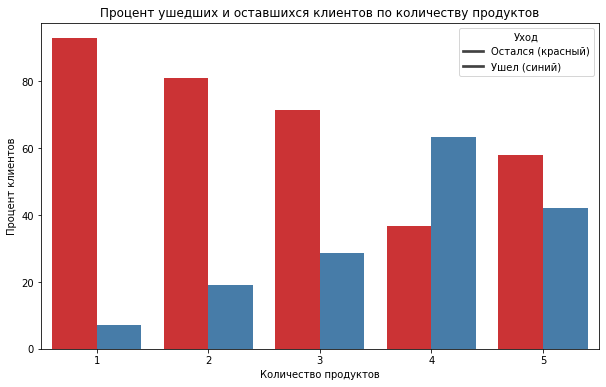

In [18]:
# Подсчет количества ушедших и оставшихся клиентов по количеству продуктов
churn_counts = data.groupby(['products', 'churn']).size().unstack(fill_value=0)

# Расчет процентов
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Преобразование данных для визуализации
churn_percent = churn_percent.reset_index().melt(id_vars='products', value_vars=[0, 1], 
                                                  var_name='churn', value_name='percentage')

# Исключаем значение 0 по столбцу products
churn_percent = churn_percent[churn_percent['products'] != 0]

# Построение диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_percent, x='products', y='percentage', hue='churn', palette='Set1')

# Настройка заголовка и меток осей
plt.title('Процент ушедших и оставшихся клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Процент клиентов')
plt.xticks(rotation=0)
plt.legend(title='Уход', labels=['Остался (красный)', 'Ушел (синий)'])
plt.show()

Чем больше у клиента продуктов, тем выше вероятность его ухода. О выбивающихся данных о 5 продуктах мы рассмотрим ниже. 

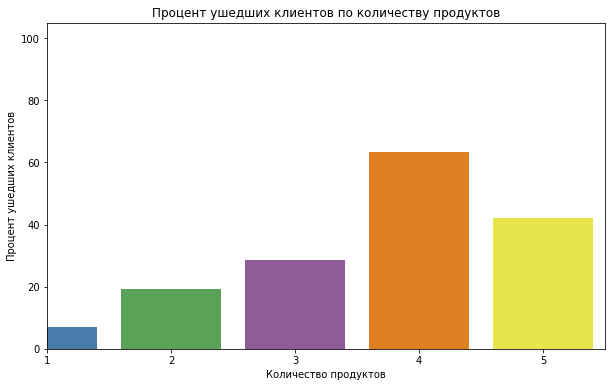

In [19]:
# Подсчет количества ушедших клиентов по количеству продуктов
churn_counts = data[data['churn'] == 1].groupby('products').size()

# Расчет процентов ушедших клиентов
total_counts = data.groupby('products').size()
churn_percent = (churn_counts / total_counts * 100).fillna(0).reset_index(name='percentage')

# Построение диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_percent, x='products', y='percentage', palette='Set1')

# Настройка заголовка и меток осей
plt.title('Процент ушедших клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Процент ушедших клиентов')
plt.xlim(1,)
plt.xticks(rotation=0)

# Показать диаграмму
plt.show()

НАЛИЧИЕ КРЕДИТНОЙ КАРТЫ

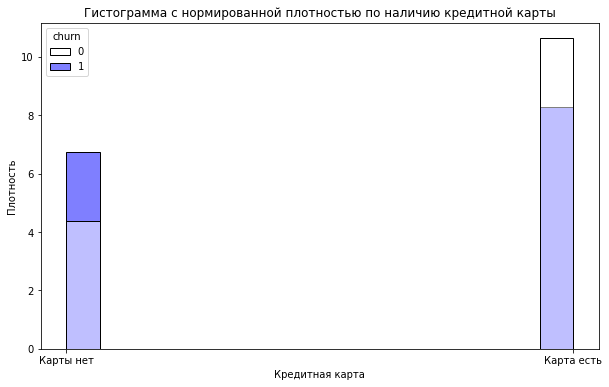

In [20]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='credit_card', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по наличию кредитной карты')
plt.xlabel('Кредитная карта')
plt.ylabel('Плотность')
# Добавляем подписи на ось X
plt.xticks([0, 1], ['Карты нет', 'Карта есть'])
plt.show()

С кредитной картой вероятность, что клиент уйдет меньше. 

### Построение графиков отточных и оставшихся клиентов по данным о доходе и активности клиента

ДОХОД КЛИЕНТА

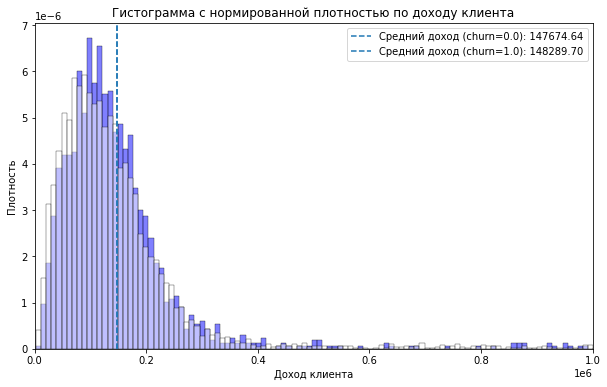

In [21]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='est_salary', stat='density', common_norm=False, palette='flag')

# Рассчет средних значений
mean_values = data.groupby('churn')['est_salary'].mean().reset_index()

# Добавление средних значений на график
for _, row in mean_values.iterrows():
    plt.axvline(x=row['est_salary'], linestyle='--', label=f'Средний доход (churn={row["churn"]}): {row["est_salary"]:.2f}')

# Настройка легенды и отображение графика
plt.legend()
plt.title('Гистограмма с нормированной плотностью по доходу клиента')
plt.xlabel('Доход клиента')
plt.ylabel('Плотность')
plt.xlim(0,1e6)
plt.show()

Вероятность ухода больше у тех клиентов, доход которых от 90 до 250 тыс., от 270-400 тыс., 500 и 1 млн 100 тыс. 

АКТИВНОСТЬ КЛИЕНТА

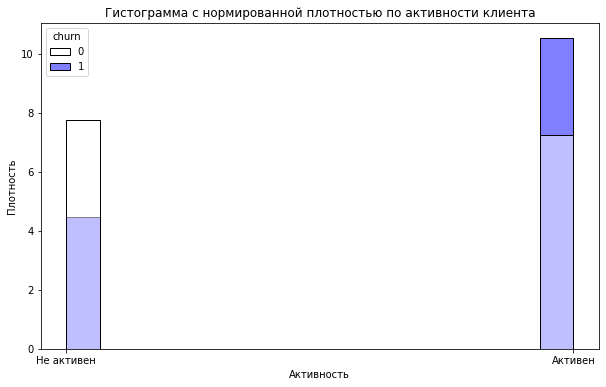

In [22]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=data, hue='churn', x='last_activity', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по активности клиента')
plt.xlabel('Активность')
plt.ylabel('Плотность')
# Добавляем подписи на ось X
plt.xticks([0, 1], ['Не активен', 'Активен'])
plt.show()

Вероятность, что ушедший клиент был активным больше.

In [23]:
# Группируем данные по активности клиента и статуса отточности 
churn_stats = data.groupby(['last_activity', 'churn']).size().unstack(fill_value=0)

# Предполагаем, что churn_stats уже содержит необходимые данные
churn_stats['процент'] = (churn_stats[1] / (churn_stats[0] + churn_stats[1]) * 100).round(2)

# Форматирование для добавления знака %
churn_stats['процент'] = churn_stats['процент'].astype(str) + '%'
# Выводим результаты
print(churn_stats)

# Определяем, кто чаще уходит
if churn_stats.loc[1, 1] > churn_stats.loc[0, 1]:
    print("Чаще уходят активные клиенты.")
elif churn_stats.loc[1, 1] < churn_stats.loc[0, 1]:
    print("Чаще уходят неактивные клиенты.")
else:
    print("Количество уходящих клиентов одинаково для активных и неактивных.")

churn             0     1 процент
,last_activity                    
,0              4217   542  11.39%
,1              3938  1277  24.49%
,Чаще уходят активные клиенты.


In [24]:
# Группируем данные по активности клиента и статуса отточности 
churn_stats = data.groupby(['last_activity', 'churn']).size().unstack(fill_value=0)

# Предполагаем, что churn_stats уже содержит необходимые данные
churn_stats['процент'] = (churn_stats[1] / (churn_stats[0] + churn_stats[1]) * 100).round(2)

# Форматирование для добавления знака %
churn_stats['процент'] = churn_stats['процент'].astype(str) + '%'

# Переименовываем индексы
churn_stats = churn_stats.rename(index={0: 'Не активен', 1: 'Активен'})

# Выводим результаты
print(churn_stats)

# Определяем, кто чаще уходит
if churn_stats.loc['Активен', 1] > churn_stats.loc['Не активен', 1]:
    print("Чаще уходят активные клиенты.")
elif churn_stats.loc['Активен', 1] < churn_stats.loc['Не активен', 1]:
    print("Чаще уходят неактивные клиенты.")
else:
    print("Количество уходящих клиентов одинаково для активных и неактивных.")

churn             0     1 процент
,last_activity                    
,Не активен     4217   542  11.39%
,Активен        3938  1277  24.49%
,Чаще уходят активные клиенты.


### Матрица и столбец корреляций

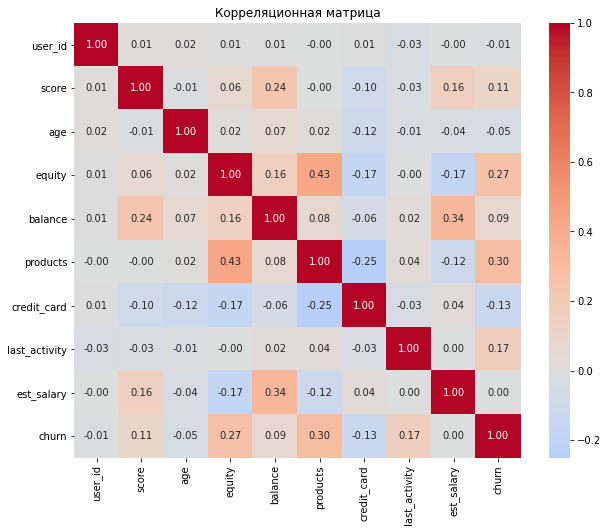

In [25]:
# Вычисляем корреляцию
correlation_matrix = data.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Корреляционная матрица")
plt.show()

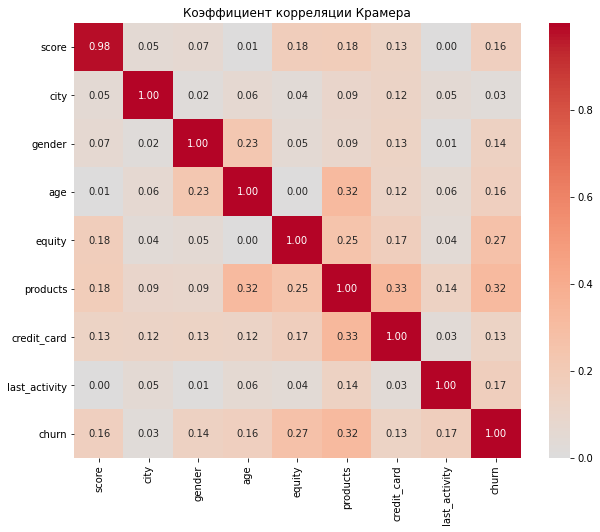

In [26]:
# Функция для вычисления коэффициента корреляции Крамера
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Общее количество наблюдений
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - 1
    kcorr = k - 1
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

# Предположим, ваш DataFrame называется data и содержит столбец user_id
data_filtered = data.drop(columns=['user_id'])  # Удаляем столбец user_id

# Получаем список категориальных столбцов
categorical_cols = data_filtered.select_dtypes(include=['object', 'int64']).columns

# Создаем матрицу корреляции Крамера
cramer_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        confusion_matrix = pd.crosstab(data_filtered[col1], data_filtered[col2])
        cramer_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Преобразуем значения в числовой формат
cramer_matrix = cramer_matrix.astype(float)

# Визуализируем матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Коэффициент корреляции Крамера")
plt.show()

Матрица корреляций показала зависимость (`умеренную`) между:
- кол-вом продуктов и кредитной картой - 0.33
- кол-вом продуктов и возрастом - 0.32
- доходом клиента и балансом на счете - 0.33
- кол-вом продуктов и отточности - 0.32

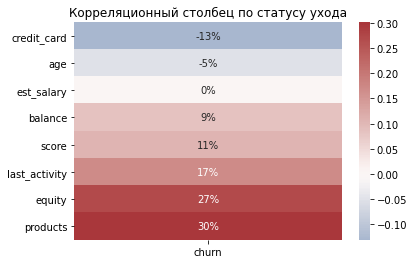

In [27]:
# Удаляем столбец user_id
df_filtered = data.drop(columns=['user_id'])

# Вычисляем корреляционную матрицу
correlation_matrix = df_filtered.corr()

# Строим тепловую карту
sns.heatmap(correlation_matrix.loc[:, ['churn']].drop('churn').sort_values('churn'), 
            annot=True, fmt=".0%", cmap="vlag", center=0)

plt.title("Корреляционный столбец по статусу ухода")
plt.show()

Корреляционный столбец по оттоку показал,что из всех показателей больше всего скоррелировало кол-во продуктов, хотя это не очень сильная корреляция. Еще мы обратим внимание на эту взаимосвязь при проверке гипотез.

### Портрет клиента, который склонен и не склонен уходить из банка

Клиент склонный УЙТИ из банка:
- мужчина с доходом от 100 тыс. в возрасте 25-35 лет и 50-60 лет. Имеет 2 и более продуктов, скоринговый балл выше 850. Обслуживается в Ярославле или Ростове. Имеет 3-9 баллов собственности. Баланс на счете 100-400 тыс или 450-1 млн. Когда уходил был активным клиентом.

Клиент склонный ОСТАТЬСЯ:
- женщина с доходом до 100 тыс. в возрасте 18-25 лет, 35-50, 60-85 лет. Имеет не больше 1-го продукта и скоринговый балл 650-825 и 940-990. Есть кредитная карта. Обслуживается в Рыбинске. Имеет до 2х баллов собственности. Баланс на счете до 100 тыс.

ВЫВОД ПО РАЗДЕЛУ: процент оттока клиентов - 18.24%. Перед тем, как понять какие дать рекомендаци мы построили по каждому признаку гистограммы и выделили промежутки с высокой отточностью. Из признаков выделяется
- наличие кредитной карты у тех, что остались в банке
- статус активного клиента у тех, что ушли. 
 
<br> Затем построили корреляционную матрицу. Большее влияние на уход из банка показало кол-во продуктов, которыми пользуется клиент. 
<br> Описаны портреты клиентов, что ушли и что остались. 

## Проверка гипотез

Проверим две гипотезы о доходе клиентов и количестве продуктов.

Сформулируем гипотезу. 
<br>H0: Доход у  клиентов, которые
ушли и которые остались ОДИНАКОВЫЙ.
<br> H1: Доход у  клиентов, которые
ушли и которые остались РАЗЛИЧАЕТСЯ.
<br> Применим двухсторонний t-тест.

In [28]:
# Разделение доходов клиентов по состоянию
income_left = data[data['churn'] == 1]['est_salary']
income_stayed = data[data['churn'] == 0]['est_salary']

# Уровень значимости
alpha = 0.05

# Выполним t-тест
results = st.ttest_ind(income_left, income_stayed)

# Результат
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: доходы различаются.")
else:
    print("Не хватает доказательств, чтобы отвергнуть нулевую гипотезу: доходы одинаковые.")

p-value: 0.8647861589211189
,Не хватает доказательств, чтобы отвергнуть нулевую гипотезу: доходы одинаковые.


Сформулируем вторую гипотезу для двух независимых выборок.
<br> H0: Доля количества продуктов у клиентов, которые ушли БОЛЬШЕ.
<br> H1: Доля количества продуктов у клиентов, которые ушли МЕНЬШЕ.
<br> Мы применим критерий Манна-Уитни, т.к. он менее чувствителен к выбросам и может использоваться, когда дисперсии в группах различны. 

In [29]:
# Кол-во продуктов для каждой группы
products_churned = data[data['churn'] == 1]['products']
products_not_churned = data[data['churn'] == 0]['products']

# Уровень значимости
alpha = 0.05

# Проведем тест Манна-Уитни
results = st.mannwhitneyu(products_churned, products_not_churned, alternative='less')

# Результат
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: доля продуктов у клиентов, которые ушли МЕНЬШЕ.")
else:
    print("Нет оснований отвергать нулевую гипотезу: доля продуктов у клиентов, которые ушли БОЛЬШЕ.")


p-value: 1.0
,Нет оснований отвергать нулевую гипотезу: доля продуктов у клиентов, которые ушли БОЛЬШЕ.


Сформулируем вторую гипотезу для двух независимых выборок.
<br>H0: Доля количества продуктов у клиентов, которые ушли, РАВНА доле продуктов у клиентов, которые остались.
<br> H1: Доля количества продуктов у клиентов, которые ушли, НЕ РАВНА доле продуктов у клиентов, которые остались.

In [30]:
# Предположим, что ваш DataFrame называется data
products_churned = data[data['churn'] == 1]['products']
products_not_churned = data[data['churn'] == 0]['products']

# Уровень значимости
alpha = 0.05

# Проведем тест Манна-Уитни для двухсторонней гипотезы
results = st.mannwhitneyu(products_churned, products_not_churned, alternative='two-sided')

# Результат
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: доля продуктов у клиентов, которые ушли, не равна доле продуктов у клиентов, которые остались.")
else:
    print("Нет оснований отвергать нулевую гипотезу: доля продуктов у клиентов, которые ушли, равна доле продуктов у клиентов, которые остались.")

p-value: 4.58675490285981e-161
,Отвергаем нулевую гипотезу: доля продуктов у клиентов, которые ушли, не равна доле продуктов у клиентов, которые остались.


ВЫВОДЫ ПО РАЗДЕЛУ: гипотеза опровергла влияние дохода клиента на его уход. Вторая гипотеза подтвердила подозрения - доля продуктов у клиентов, которые ушли не равна доле продуктов у клиентов, которые остались. Для формирования сегментов будем это учитывать.

## Отбор лучших и формирование сегментов

СЕГМЕНТ С ВЫДЕЛЕНИЕМ ВОЗРАСТА КЛИЕНТА И КОЛИЧЕСТВА ПРОДУКТОВ

In [31]:
segment_1 = data.query('((age >= 25 and age <= 35) or (age >= 50 and age <= 60)) and (equity >= 3) and (products >= 2)')
print("Сегмент 1")
display(segment_1)

Сегмент 1


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
12,132970,845,Ярославль,Ж,31,3,591928.52,2,1,1,112697.16,1
13,166357,837,Рыбинск,Ж,28,4,302249.22,2,0,1,30950.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9963,187204,957,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1
9972,150126,834,Ростов,М,27,4,192776.27,2,0,1,26570.39,0
9986,152986,822,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1
9988,158678,889,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0


In [32]:
# Подсчет оттока клиентов
total_churned = segment_1['churn'].sum()
total_customers = segment_1['churn'].count() # Общее количество клиентов
churn_rate = segment_1['churn'].mean() * 100  # Процент оттока

print(f"Количество ушедших клиентов: {total_churned}")
print(f"Общее количество клиентов: {total_customers}")
print(f"Процент оттока клиентов: {churn_rate:.2f}%")

Количество ушедших клиентов: 833
,Общее количество клиентов: 2304
,Процент оттока клиентов: 36.15%


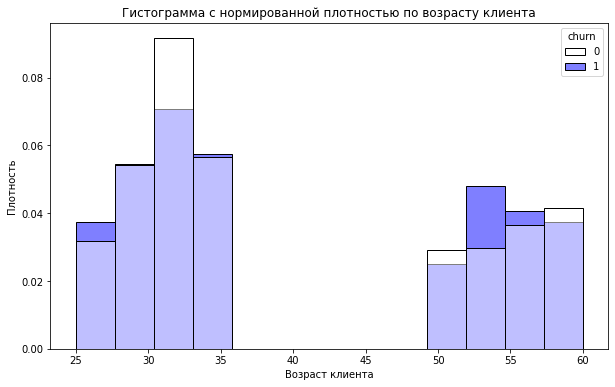

In [33]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=segment_1, hue='churn', x='age', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по возрасту клиента')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность')
plt.show()

Более точная вероятность оттока по возрасту 25-27 и 52-57 лет. 

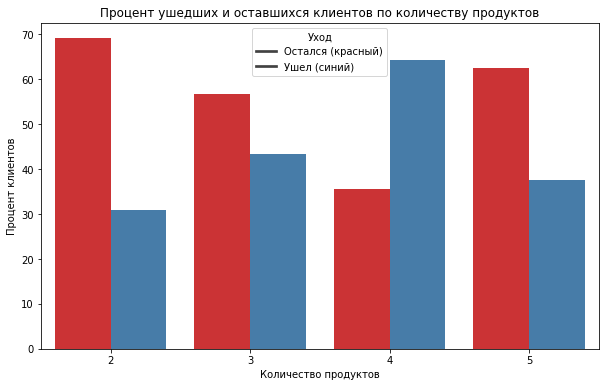

In [34]:
# Подсчет количества ушедших и оставшихся клиентов по количеству продуктов
churn_counts = segment_1.groupby(['products', 'churn']).size().unstack(fill_value=0)

# Расчет процентов
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Преобразование данных для визуализации
churn_percent = churn_percent.reset_index().melt(id_vars='products', value_vars=[0, 1], 
                                                  var_name='churn', value_name='percentage')

# Построение диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_percent, x='products', y='percentage', hue='churn', palette='Set1')

# Настройка заголовка и меток осей
plt.title('Процент ушедших и оставшихся клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Процент клиентов')
plt.xticks(rotation=0)
plt.legend(title='Уход', labels=['Остался (красный)', 'Ушел (синий)'])

# Показать диаграмму
plt.show()

In [35]:
# Подсчитаем количество клиентов с 5 продуктами
count = (segment_1['products'] == 5).sum()

print(f'Количество клиентов с 5 продуктами: {count}')

Количество клиентов с 5 продуктами: 8


Чем больше у клиента продуктов, тем вероятность оттока увеличивается. А при 5 продуктах процент ушедших клиентов меньше в 2 раза - всего 8 клиентов. Возможно выборка с 5ю продуктами слишком мала, чтобы корректно ее оценивать.

РЕКОМЕНДАЦИЯ: 
- возможно наблюдаются проблемы с удобством пользования мобильного приложения. Обеспечить удобный доступ к услугам банка через мобильное приложение, которое позволяет управлять НЕСКОЛЬКИМИ продуктами (счета, кредиты, инвестиции) в одном месте. 
- сегменту можно предложить кэшбэк на определенные транзакции или услуги, когда клиент использует несколько продуктов банка. 
- для возрастной группы 52-57 лет предложить специальные пенсионные счета с повышенными ставками или выгодные условия по кредитам для пенсионеров. Также для этого возраста можно организовать услуги по планированию выхода на пенсию и управлению пенсионными накоплениями. Ведь клиенты 60+ менее отточны и важно привлечь их в предпенсионном возрасте.

СЕГМЕНТ С ВЫДЕЛЕНИЕМ СКОРИНГОВОГО БАЛЛА И ОТСУТСТВИЯ КРЕДИТНОЙ КАРТЫ

In [36]:
segment_2 = data.query('((score >= 825 and score <= 910) or (score >= 930 and score <= 940)) and (credit_card == 0) and (age <= 65)')
print("Сегмент 2")
display(segment_2)
# Ограничение возраста, т.к. кредитная карта выдается до 65 лет

Сегмент 2


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
13,166357,837,Рыбинск,Ж,28,4,302249.22,2,0,1,30950.94,0
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0
21,177415,896,Рыбинск,Ж,47,0,NaN,1,0,0,225060.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9972,150126,834,Ростов,М,27,4,192776.27,2,0,1,26570.39,0
9973,120403,859,Рыбинск,М,37,3,410112.86,1,0,1,103821.40,0
9976,208085,876,Ростов,М,38,0,NaN,1,0,0,171763.69,0
9981,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1


In [37]:
# Подсчет оттока клиентов
total_churned = segment_2['churn'].sum()
total_customers = segment_2.shape[0]  # Общее количество клиентов
churn_rate = total_churned / total_customers * 100  # Процент оттока

print(f"Количество ушедших клиентов: {total_churned}")
print(f"Общее количество клиентов: {total_customers}")
print(f"Процент оттока клиентов: {churn_rate:.2f}%")

Количество ушедших клиентов: 580
,Общее количество клиентов: 1637
,Процент оттока клиентов: 35.43%


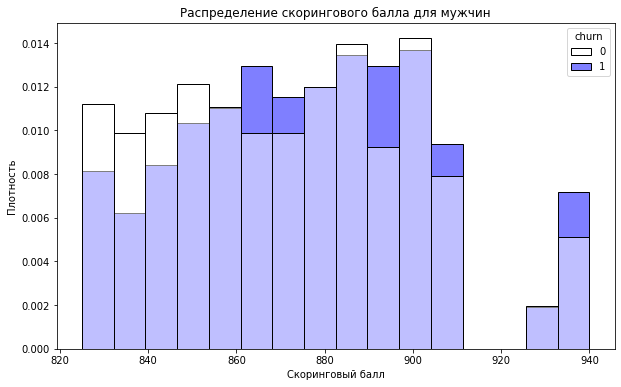

In [38]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=segment_2, hue='churn', x='score', stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика
plt.title('Распределение скорингового балла для мужчин')
plt.xlabel('Скоринговый балл')
plt.ylabel('Плотность')
plt.show()

Здесь мы видим, что с баллом 830 и 850-880 клиентов ушло больше, чем осталось.

РЕКОМЕНДАЦИЯ: Сегменту можно разослать предложение на оформление кредитной карты на привлекательных условиях. Наличие карты минимизирует вероятность оттока. Высокий скоринговый балл в этом сегменте увеличит процент одобрения.

СЕГМЕНТ С ВЫДЕЛЕНИЕМ ДОХОДА, БАЛЛА СОБСТВЕННОСТИ И ПОЛА КЛИЕНТА

In [39]:
segment_3 = data.query("(((est_salary >= 90000 and est_salary <= 250000) or (est_salary >= 270000 and est_salary <= 400000) or (est_salary >= 500000 and est_salary <= 1100000))) and (equity >= 3) and (gender == 'М')")
print("Сегмент 3")
display(segment_3)

Сегмент 3


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
14,172138,815,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9977,158143,807,Ростов,М,43,4,1124809.48,1,1,1,185230.60,1
9981,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1
9983,179959,762,Ярославль,М,46,3,286775.87,2,1,1,124931.69,0
9988,158678,889,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0


In [40]:
# Подсчет оттока клиентов
total_churned = segment_3['churn'].sum()
total_customers = segment_3.shape[0]  # Общее количество клиентов
churn_rate = total_churned / total_customers * 100  # Процент оттока

print(f"Количество ушедших клиентов: {total_churned}")
print(f"Общее количество клиентов: {total_customers}")
print(f"Процент оттока клиентов: {churn_rate:.2f}%")

Количество ушедших клиентов: 670
,Общее количество клиентов: 1715
,Процент оттока клиентов: 39.07%


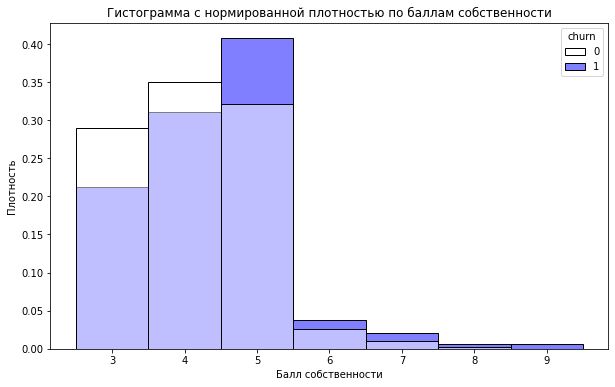

In [41]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=segment_3, hue='churn', x='equity', discrete=True, stat='density', common_norm=False, palette='flag')

# Настройка легенды и отображение графика

plt.title('Гистограмма с нормированной плотностью по баллам собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Плотность')
plt.show()

В этом сегменте вероятность отточности больше у клиентов с баллом собственности от 5. 

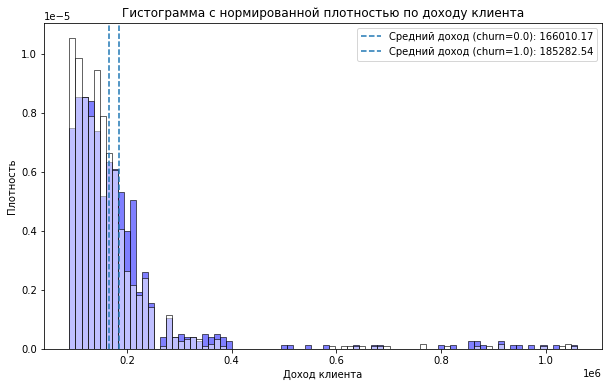

In [42]:
# Создание графика гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=segment_3, hue='churn', x='est_salary', stat='density', common_norm=False, palette='flag')

# Рассчет средних значений
mean_values = segment_3.groupby('churn')['est_salary'].mean().reset_index()

# Добавление средних значений на график
for _, row in mean_values.iterrows():
    plt.axvline(x=row['est_salary'], linestyle='--', label=f'Средний доход (churn={row["churn"]}): {row["est_salary"]:.2f}')

# Настройка легенды и отображение графика
plt.legend()
plt.title('Гистограмма с нормированной плотностью по доходу клиента')
plt.xlabel('Доход клиента')
plt.ylabel('Плотность')
plt.show()

Клиенты уходят чаще всего с доходом 90-120 тыс, 200-230 тыс.

РЕКОМЕНДАЦИЯ:
- оформление автокредита по льготной ставке 
- промокод на оформление страхования движимого и недвижимого имущества.

<br> Доход позволит собрать минимальный пакет документов для оформления кредита, т.к. в данном сегменте вероятность, что весь доход приходит в наш банк высок. 

ВЫВОД ПО РАЗДЕЛУ: определено три сегмента. По ним даны рекомендации для улучшения ситуации высокого оттока. 

## Общий вывод

Мы проанализировали данные по клиентам регионального банка. Всего предоставлено 10 тыс клиентов из трех городов Ярославь, Ростов и Рыбинск.

ПРЕДОБРАБОТКА ДАННЫХ
<br> Дубликатов в датасете не было. Пропуски были в столбце возраста - удалено 26 клиентов, и в столбце с балансом на счете - их оставим, т.к. таких клиентов много - 22.95%. 

ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ
<br> Всего ушедших клиентов 18.24%. Для детального анализа все признаки мы разделили на три группы, по которым построили гистограммы с нормированной плотностью и выделили промежутки, при которых вероятность ухода клиентов выше. 
Особо выделились отточные сегменты по следующим признакам: 
- по городам - в Ярославле отток больше;
- по гендеру - выделились мужчины как клиенты, которые чаще уходят;
- по количеству собственности - имея от 3х до 9 баллов собственности клиенты более отточные;
- по кол-ву продуктов - клиенты с 4мя продуктами чаще уходят;
- по наличию кредитной карты - если карта есть вероятность, что клиент уйдет меньше. 
- по доходу - от 100 тыс вероятность оттока больше.

МАТРИЦА КОРРЕЛЯЦИЙ показала, что больше всего скоррелировало с оттоком кол-во продуктов, поэтому мы проверили этот параметр выдвинув гипотезу.

ПРОВЕРКА ГИПОТЕЗ
<br> Чем больше у клиентов продуктов, тем чаще они уходили.
<br> Вторая гипотеза показала, что доход у клиентов, которые ушли не равен доходу, которые остались.

РЕКОМЕНДАЦИИ 
<br> В разделе ОТБОР ДАННЫХ И ФОРМИРОВАНИЕ СЕГМЕНТОВ даны рекомендации по трем сегментам. Общая рекомендация по всем сегментам: возможно наблюдаются проблемы с удобством пользования мобильного приложения. Обеспечить удобный доступ к услугам банка через мобильное приложение, которое позволяет управлять НЕСКОЛЬКИМИ продуктами (счета, кредиты, инвестиции) в одном месте.

Клиентов по признаку баланса мы не анализировали, т.к. здесь было много пропусков и все-таки баланс не отображает полной картины положения клиента. Ведь у клиента могут быть большие средства на счете после проведенной сделки с недвижимостью.